# Resultados de Laboratorio

1. Importar resultados. Preparación de data.
2. Definir una función para representar los resultados en gráficas.
3. Presentar los resultados.

In [2]:
import os
import sys
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statistics

Datasets:


## Importar resultados

In [58]:
def import_file(basePath, filename):
    file = basePath + '/' + filename

    data_import = {}
    with open(file) as json_file:
        data_import = json.load(json_file)

    return data_import

def read_files(basePath='../lab/results_csv'):
    files = []

    for f in os.listdir(basePath):
        if os.path.isfile(os.path.join(basePath, f)) and f.endswith(".csv"):
            files.append(f)

    data_to_plot = pd.DataFrame()

    for filename in files:
        data_import = pd.read_csv(basePath + "/" + filename) 
        
        data_to_plot = pd.concat([data_to_plot, data_import])
    
    data_to_plot['density'] = round(data_to_plot['density'], 2)
    return data_to_plot

## Definir script para gráficas

In [52]:
# Return list with algoruthms fastest
def algorithms_faster(data, fasterNum=3):
    dd = data.groupby('algorithm')['time'].mean().to_frame().sort_values(by=['time'])
    return dd.index.tolist()[:fasterNum]

# Draw seaborn With data.
# Faster (Just include 3 algorithms faster)
# densityGroup (Group by Density)
def draw_plot_seaborn_bar(data, faster=False, densityGroup=True, fasterNum=3): 
    if not faster:
        if densityGroup:
            sns.barplot(y='algorithm', x='time', data=data, hue="density", capsize=.2)
        else:
            sns.barplot(y='algorithm', x='time', data=data, capsize=.2)
    else:
        faster_al = algorithms_faster(data, fasterNum=fasterNum)
        data_filter = data.loc[data['algorithm'].isin(faster_al)]
        if densityGroup:
            sns.barplot(y='time', x='density', data=data_filter, hue="algorithm", capsize=.2)
        else:
            sns.barplot(y='algorithm', x='time', data=data_filter, capsize=.2)
    plt.show()

# Draw seaborn simple with data
def draw_plot_seaborn_bar_simple(data): 
    sns.barplot(y='algorithm', x='time', data=data, capsize=.2)
    plt.show()

# Draw 3 plot diffetent
def draw_all_plot(data, num_nodes, type_incremental, withGroup=True, fasterNum=3):
    data_filter = data.loc[ (data['nodes'] == num_nodes) & (data['type'] == type_incremental)]
    
    data_filter_one_calc = data_filter.groupby('algorithm')['time'].mean().to_frame()
    data_filter_one_calc['algorithm'] = data_filter_one_calc.index.values
    data_filter_one_calc

    draw_plot_seaborn_bar(data_filter, faster=False, densityGroup=False) 
    if withGroup:
        draw_plot_seaborn_bar(data_filter, faster=True, densityGroup=True, fasterNum=fasterNum) 
    draw_plot_seaborn_bar_simple(data_filter_one_calc)


# *RESULTADOS*

Load file from folder:

In [70]:
data = read_files()

# Insert Random Edge (100 nodes)

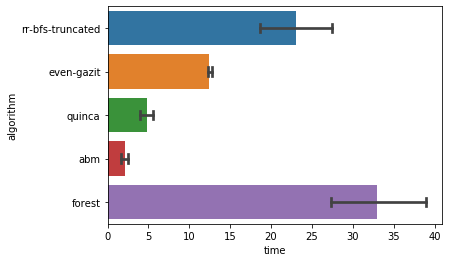

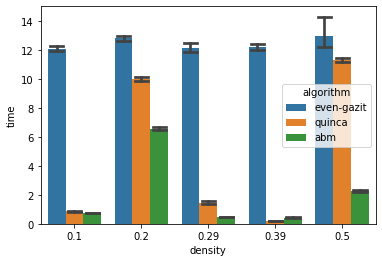

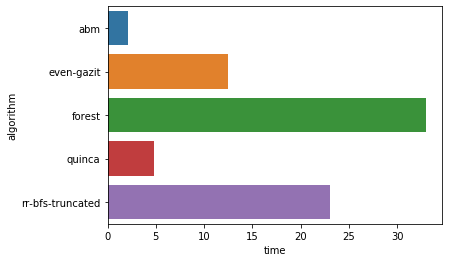

In [61]:
draw_all_plot(data, 100, 'insert_edge')

# Insert Random Edge (1.000 nodes)

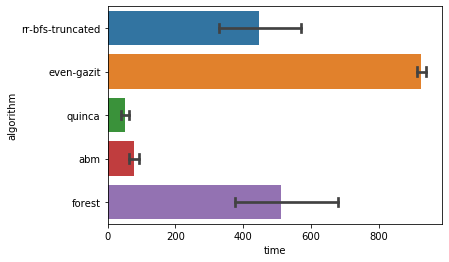

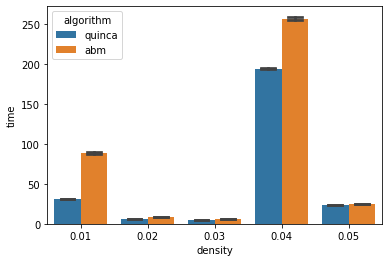

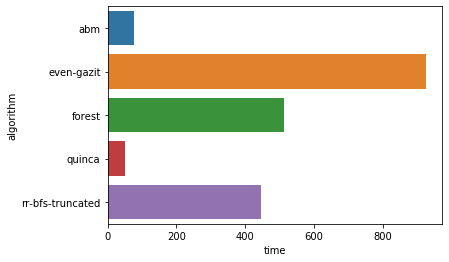

In [62]:
draw_all_plot(data, 1000, 'insert_edge', fasterNum=2)

# Insert Random Edge (2.000 nodes)

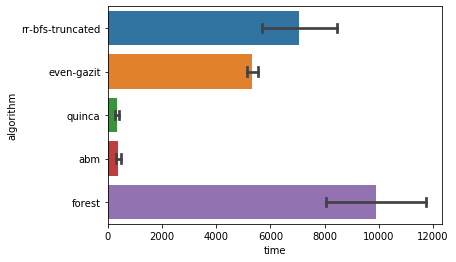

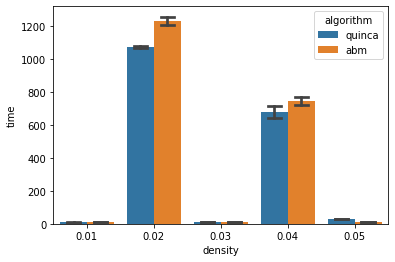

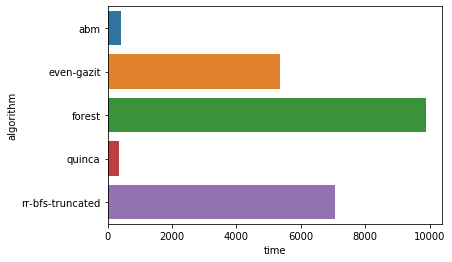

In [64]:
draw_all_plot(data, 2000, 'insert_edge', fasterNum=2)

# Insert Worst Edge (100 nodes)

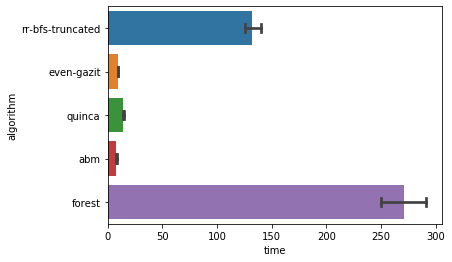

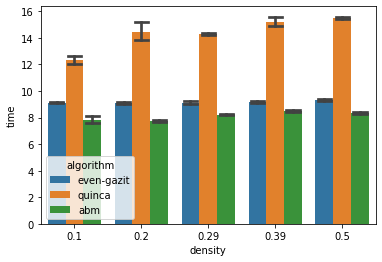

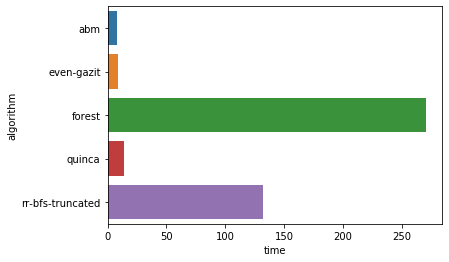

In [65]:
draw_all_plot(data, 100, 'insert_worst_edge')

# Insert Worst Edge (1.000 nodes)

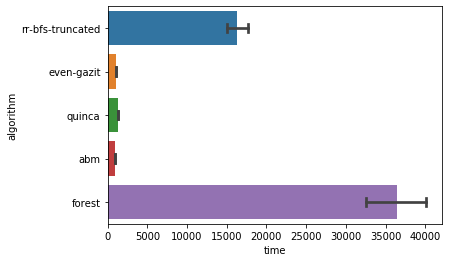

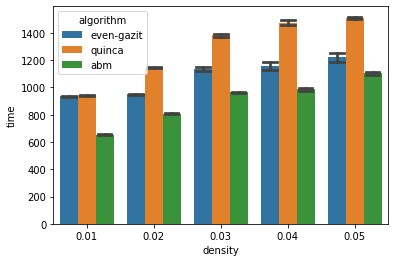

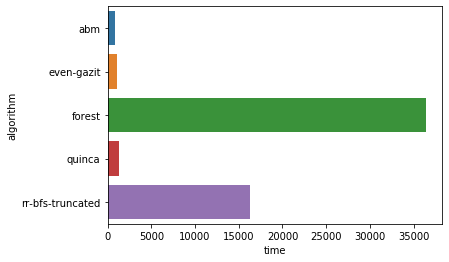

In [66]:
draw_all_plot(data, 1000, 'insert_worst_edge')

# Decrease Random Edge (100 nodes)

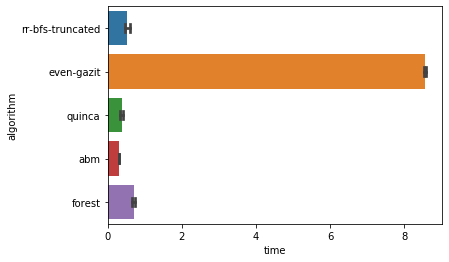

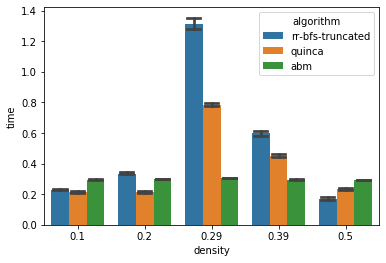

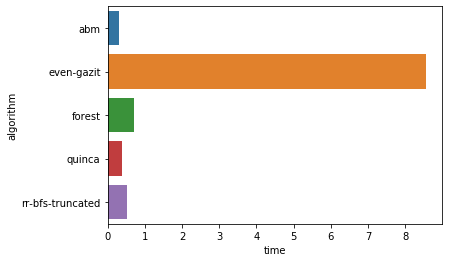

In [68]:
draw_all_plot(data, 100, 'decrease_edge')

# Decrease Random Edge (1.000 nodes)

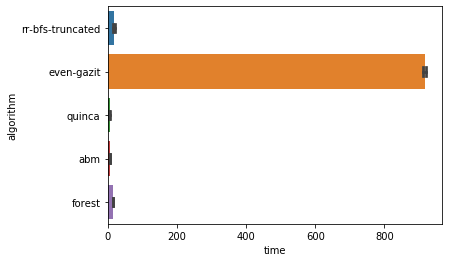

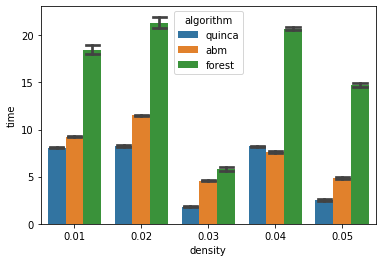

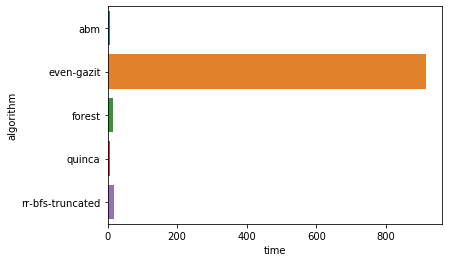

In [69]:
draw_all_plot(data, 1000, 'decrease_edge')

# Decrease Worst Edge (100 nodes)

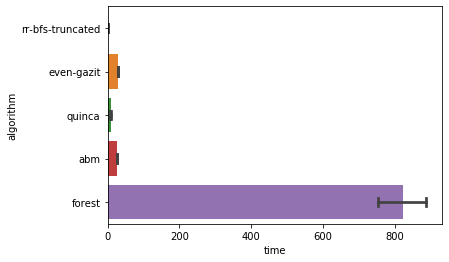

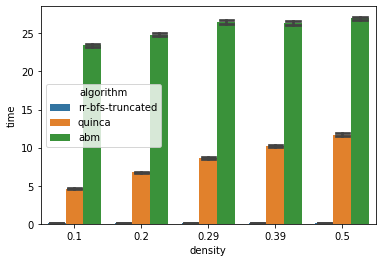

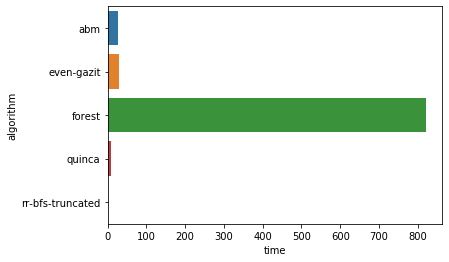

In [74]:
draw_all_plot(data, 100, 'decrease_worst_edge')

--------------------------------------------------------------------------------
# Experiments Generating random

### Create 10 graphs and generate results, try 20 times.

In [88]:
data_random = read_files('../lab/results_many_random')

## Insert Random Edge (100 Nodes)

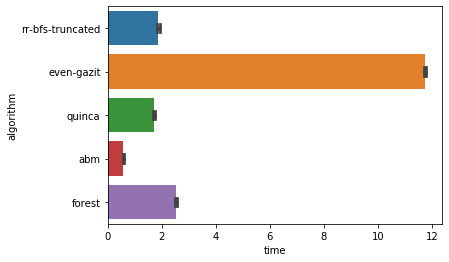

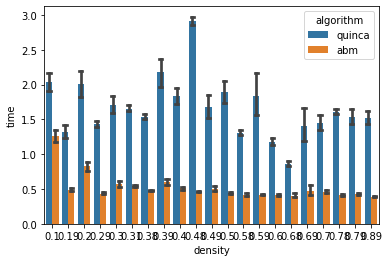

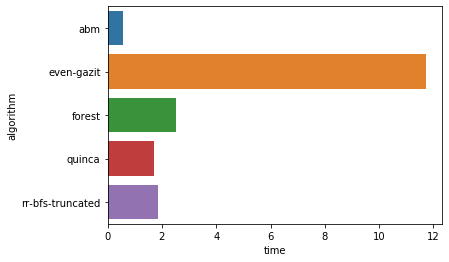

In [84]:
draw_all_plot(data_random, 100, 'insert_edge', withGroup=True, fasterNum=2)

## Insert Random Edge (1.000 Nodes)

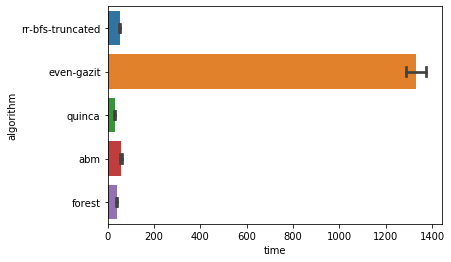

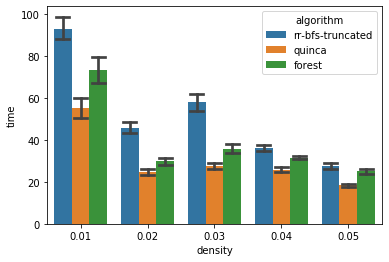

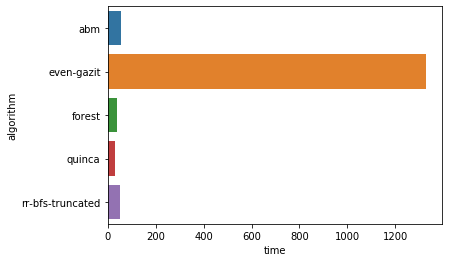

In [79]:
draw_all_plot(data_random, 1000, 'insert_edge')

## Insert Worst Edge (100 Nodes)

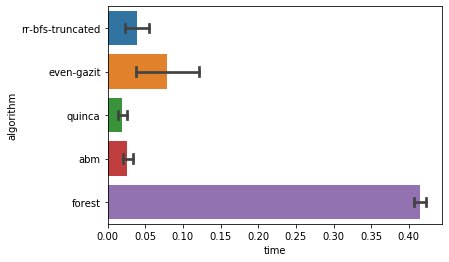

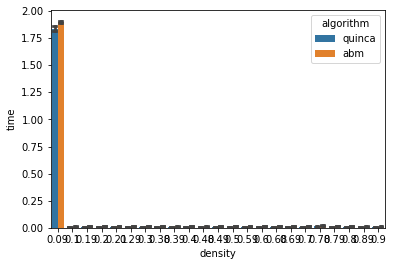

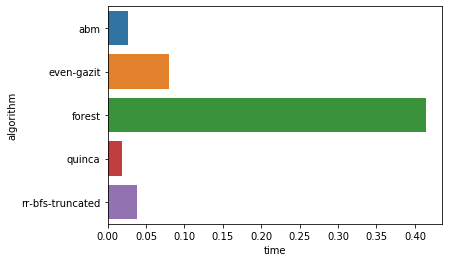

In [90]:
draw_all_plot(data_random, 100, 'insert_worst_edge', withGroup=True, fasterNum=2)